
## Arbitrage-Free Pricing
### Precificação por Replicação e Teoria da Arbitragem
#### Teoria Financeira: parte 1
Tutorial por: 
* Github: victordhn
* Twitter: @victor_dhn
* [Linkedin: Victor Dahan](https://www.linkedin.com/in/victor-dahan-04392451/)

Baseado no livro do Yves Hilpisch, recomendo a leitura.

---


#### Vamos basear o modelo em uma economia de 2 estados e 2 períodos

Antes de começar, é necessário relembrar alguns conceitos, e como podemos modelar eles no Python. Vamos começar com uma economia sem incerteza, onde o valor exato dos investimentos em $t_0$ e $t_1$ são conhecidos.

#### (1) Primeiro momento: investimento e retorno conhecidos

#### Conceitos:

Tempo e Fluxo de Caixa:
* **Tempo:** 0 e 1
* **Fluxo de Caixa:** $c = (c_0,c_1)$ onde $c_0$ = investimento em $t=0$ e $c_1$ = pagamento em $t=1$  <br/> Nessa primeira etapa o modelo considera apenas um valor possível para $c_1$

Retornos:
* **Retorno:** $R=(c_1-c_0)$
* **Taxa de Retorno:** $r=(c_1-c_0)/c_0$
* **Taxa de Juros:** $i=r$, caso o investimento seja uma aplicação bancária
* **Valor Presente:** $VP=c_1/(1+i)$
* **Valor Presente Líquido:** $VPL=VP+c_0$, lembrando que $c_0$ entra com valor negativo por ser um aporte

Alguns códigos para ilustrar os conceitos:


In [1]:
import numpy as np
# fluxo de caixa
c0 = -10
c1 = 12
c = (c0,c1)
print(f'Fluxo de caixa: {c}')

# retorno
R = sum(c)
r = R/c0
print(f'Retorno: {R} e taxa de retorno: {r}')

# valor presente
i = 0.1
def D(c1):
    return c1/(1+i)
print(f'Valor presente para c1=11 e i=0.1: {D(12.1):.2f}')

# valor presente líquido
def NPV(c):
    return c[0] + D(c[1])
print(f'Valor presente líquido para c=(-10,12): {NPV(c):.2f}')

Fluxo de caixa: (-10, 12)
Retorno: 2 e taxa de retorno: -0.2
Valor presente para c1=11 e i=0.1: 11.00
Valor presente líquido para c=(-10,12): 0.91


#### (2) Segundo momento: adicionando incertezas no modelo
Nesse segundo momento, vamos adicionar incertezas no modelo a respeito do valor do ativo em $t_1$.

#### Conceitos:

Incerteza e risco:
* **Incerteza nos Cashflows:** dois possíveis estados para $c_1=(c_1^u,c_1^d)$
* **Ativo Financeiro:** contrato com preço fixo em $t=0$ e preço variável em $t=1$ <br /> $S_t=(S_0,S_1)$, $t \in {0,1}$  <br /> $S_1=(S_1^u,S_1^d)$
* **Risco:** probabilidade de cada evento acontecer: $P=(p,1-p)$

Valor e retorno esperado:
* **Valor Esperado:** é a média dos valores possíveis de $S_1$ ponderada por suas probabilidades: <br /> 
$E^P(S_1) = (P * S_1) = p*S_1^u + (1-p)*S_1^d$

* **Retorno Esperado:** o conceito é equivalente à ao retorno explicado antes, porém usando o valor esperado do ativo em $t_1$: <br /> 
$E^P(R)=E^P(S_1)-S_0$  

* **Taxa de Retorno Esperado:** seguindo a mesma linha, dividimos o retorno esperado pelo valor em $t=0$: <br /> $\mu=E^P(r)=E^P(R)/S_0$ <br /> Como utilizaremos muito o conceito de taxa de retorno esperado, vamos "apelida-lo" de $\mu$

Volatilidade:
* **Volatilidade:** a volatilidade é o desvio padrão da taxa de retorno e mede o quanto as taxas de retorno variam ao redor da taxa de retorno esperada: <br /> $\sigma(r) = \sqrt{\sigma^2(r)}$, onde $\sigma^2(r)=E^p\big((r-\mu)^2\big)$

In [2]:
import numpy as np
# incerteza nos cashflows
c1=np.array((35,11))
c=(c0,c1)
print(f'Fluxo de caixa em t=0: {c[0]}; Possíveis fluxos de caixa em t=1: {c[1]}')

print('\n----- Ativos Financeiros -----')
# ativo financeiro
S0 = 10
S1 = np.array((20,5))
S = (S0,S1)
print(f'O ativo financeiro S tem preço R${S[0]:.2f} em t=0 e possíveis preços R${S[1][0]:.2f} ou R${S[1][1]:.2f} em t=1')

# risco (probabilidade dos eventos)
p = 0.4
P = np.array((p,1-p))
print(f'A probabilidade de se obter S1=R${S[1][0]:.2f} é de {P[0]*100}%, enquanto para S1=R${S[1][1]:.2f} a probabilidade é de {P[1]*100}%')

# valor esperado
E = np.dot(P,S1)
print(f'O valor esperado do ativo em t=1 é de R${E:.2f}')

# retorno esperado e taxa de retorno
def ER(x0,x1):
    return np.dot(P,x1)-x0
print(f'O retorno esperado do ativo é de R${ER(S[0],S[1]):.2f}')

def mu(x0,x1):
    return (np.dot(P,x1)-x0)/x0
print(f'A taxa de retorno esperada do ativo é de {mu(S[0],S[1]):.2f}')

# volatilidade
def sigma(P,x0,x1):
    r = (x1-x0)/x0 #definindo cada taxa de estorno específica
    r_exp = mu(x0,x1) #definindo a taxa de retorno esperada
    sigma2 = np.dot(P,(r-r_exp)**2) #definindo a variancia das taxas de retorno
    sigma = np.sqrt(sigma2) #definindo o desv. padrão das taxas de retorno = volatilidade
    return sigma
sigma(P,S[0],S[1])
print(f'A volatilidade da taxa de retorno é de: {sigma(P,S[0],S[1]):.4f}')

Fluxo de caixa em t=0: -10; Possíveis fluxos de caixa em t=1: [35 11]

----- Ativos Financeiros -----
O ativo financeiro S tem preço R$10.00 em t=0 e possíveis preços R$20.00 ou R$5.00 em t=1
A probabilidade de se obter S1=R$20.00 é de 40.0%, enquanto para S1=R$5.00 a probabilidade é de 60.0%
O valor esperado do ativo em t=1 é de R$11.00
O retorno esperado do ativo é de R$1.00
A taxa de retorno esperada do ativo é de 0.10
A volatilidade da taxa de retorno é de: 0.7348


#### Finalmente, falaremos sobre Arbitrage-Free Pricing.

A ideia básica é mostrar que qualquer ativo (genericamente usamos o conceito de Contingent Claim explicado abaixo) pode ser replicado por um portfolio contendo apenas um ativo livre de risco e um ativo com risco e payoffs conhecidos

#### Contingent Claim
Antes de prosseguir, eu não traduzi esse termo porque eu não vejo ele sendo muito usado em português. Um contingent claim nada mais é que um ativo cujo pagamento em $t_1$ depende de um ou outro cenário se concretizar. Ele pode ser um pagamento que depende só do cenário, ou que depende também de outro ativo (por exemplo, os derivativos financeiros). Como vamos utilizar muitos conceito de opções nos modelos que se seguem, vamos definir uma call option aqui:

* **Call Option**: opção de compra cujo payoff em $t_1$ depende do valor do ativo subjacente: $S_1$, e do strike price $K$ da opção. <br /> 
$C_1(S_1(\omega))=max(S_1(\omega)-K,0)$, *onde $S_1(\omega)$ representa o valor do ativo no cenário $\omega$* <br />

Em resumo, se o valor do ativo é maior que $K$, a opção é exercida e seu payoff é $S_1(\omega)-K$. Se o valor do ativo for inferior a K, a opção tem payoff 0.

Text(0, 0.5, 'Payoff da Call: $C_1$')

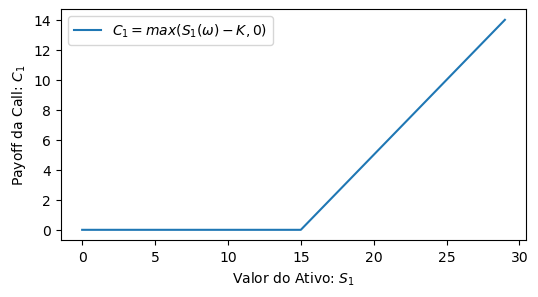

In [3]:
import numpy as np
# simulação do valor da call option:

# primeiro definimos um range de valores para o ativo (de R$0,00 a R$30,00)
S1 = np.arange(30)

# definimos o valor do strike para call K=15 e a função que captura o seu payoff C1
K=15
C1 = np.maximum(S1-K,0) #sempre que o ativo for inferior: S1-K<0 logo o payoff da opção será 0.

# plotando
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
plt.plot(S1,C1,label='$C_1=max(S_1(\omega)-K,0)$')
plt.legend()
plt.xlabel('Valor do Ativo: $S_1$')
plt.ylabel('Payoff da Call: $C_1$')

#### Replicação de payoffs
Suponha que nós tenhamos um ativo livre de risco, um ativo com risco, e uma opção de compra (call). Pela lei do preço único, se nós conseguirmos replicar perfeitamente o payoff da call (considerando todos os possíveis estados) utilizando apenas os ativos (com risco e livre de risco), o valor do portfolio e da opção de compra devem ser iguais.
* Se dois investimentos possuem exatamente a mesma distribuição de payoffs, então eles também devem ter o mesmo preço.

1. Considere o ativo livre de risco valendo 10 em $t=0$ e 11 em $t=1$: $B=(10,11)$ *vamos considerar uma treasury bond*
2. Considere o ativo arriscado valendo 10 em $t=0$ e podendo valer 20 ou 5 em $t=1$: $S=(10,(20,5))$ *aqui consideramos uma ação*
3. Por fim, assumindo um strike price de 15, considere uma call com dois payoffs possíveis dependendo de S: $C_1=(5,0)$

Se houver uma combinação de $b$ e $s$ que resolva as seguintes equações, então temos como replicar perfeitamente o payoff da call utilizando apenas os 2 ativos.

$b*B_1+s*S_1^u=C_1^u$ <br />
$b*B_1+s*S_1^d=C_1^d$

Vamos utilizar matrizes para resolver b e s.

$M * \phi = C_1$ $\therefore$ $ \begin{bmatrix} 11 & 20 \\ 11 & 5 \end{bmatrix}  $ $ \begin{bmatrix} b \\ s 
\end{bmatrix}  $ = $ \begin{bmatrix} 5 \\ 0 \end{bmatrix}  $

spoiler:
* b = -0.1515 e s = 0.3333
* **Isso significa que podemos replicar o payoff da call vendendo 0.16 bonds a descoberto e comprando 0.33 ações**

In [4]:
B = (10, np.array((11, 11)))
S = (10, np.array((20, 5)))

In [5]:
# precisamos transpor a matriz para ficar de acordo com as equações
M = np.array((B[1],S[1])).T
M

array([[11, 20],
       [11,  5]])

In [6]:
# obtendo os payoffs da call (C1)
K=15
C1 = np.maximum(S[1]-K,0)
C1

array([5, 0])

In [7]:
# resolvendo para achar b e s
phi = np.linalg.solve(M,C1)
phi

array([-0.15151515,  0.33333333])

repetindo...
* b = -0.1515 e s = 0.3333
* **Isso significa que podemos replicar o payoff da call vendendo 0.16 bonds a descoberto e comprando 0.33 ações**

continuação...
* Portando, como replicamos perfeitamente o payoff da call, o valor da call em $t=0$ e em $t=1$ é o mesmo valor do portfolio que acabamos de montar, logo: <br />
$V_t(\phi)=b*B_t+s*S_t$ sendo $t \in {0,1}$ <br />
$V=(V_0,V_1) = (1.82,(5,0))$ <br />
*lembre-se que em $t_1$ teremos 2 valores possíveis*


In [8]:
V0 = phi[0]*B[0]+phi[1]*S[0]
np.round(V0,decimals=2)

1.82

In [9]:
V1 = phi[0]*B[1]+phi[1]*S[1]
np.round(V1,decimals=2)

array([5., 0.])

#### Arbitragem

Utilizando as porcentagens que temos até o momento: $p=0.4$, $1-p=0.6$, caso a call esteja valendo 2 reais hoje, existe uma possibilidade de **arbitragem**:
1. em $t=0$: vender a call a descoberto e comprar o portfolio de replicação, embolsando 0.18 de lucro.
2. em $t=1$: o valor esperado do porfolio é de 2 reais, assim como o valor esperado da call, e portanto, vendemos o portfolio, e recompramos a call que estavamos em short, resultando em net = 0 em $t=1$.
3. no total: lucramos 0.18 em 2 períodos com zero de investimento

Em geral, as teorias não aceitam modelos que permitam arbitragem, portanto, o valor das contingent claims vai ser igual ao valor do portfolio de replicação em todos os períodos:
$$C=(C_0,C_1)=(V_0(\phi),V_1(\phi))$$

#### Market Completeness
Esse modelo de precificação de ativos atravez da replicação de portfolios e da teoria da arbitragem garante que todo portfolio pode ser perfeitamente replicado desde que haja solução para o sistema de matrizes: $M * \phi = C_1$.

A única forma de não haver solução para este sistema é quando o determinante matriz M é 0, ou seja, as colunas são linearmente dependentes. Isso só seria possível caso os payouts do ativo com risco em $t=1$ pudessem ser iguais. Portanto, a condição que impomos é que $S_1=(S_1^u,S_1^d)$, onde $S_1^u \neq S_1^d$.

---

### Pronto, acabamos de definir a Teoria do Arbitrage-Free Pricing. 

#### Passamos por todos os pontos e premissas e chegamos à conclusão de que qualquer ativo pode ser replicado por um portfolio contendo apenas o ativo livre de risco, e um ativo com risco conhecido. Então, a partir da precificação deste portfolio e da lei do preço único, descobrimos o preço do ativo que queremos precificar.

Assim terminamos a parte 1 do tutorial sobre Teoria Financeira.

Na próxima parte irei falar sobre as Teorias Fundamentais do Asset Pricing